In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
from keras import Sequential
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
import math
import random
from sklearn.metrics import classification_report
import pathlib
import os
import cv2
import PIL
import joblib
from keras import layers
import tensorflow_hub as hub

# Convolutional Neural Network

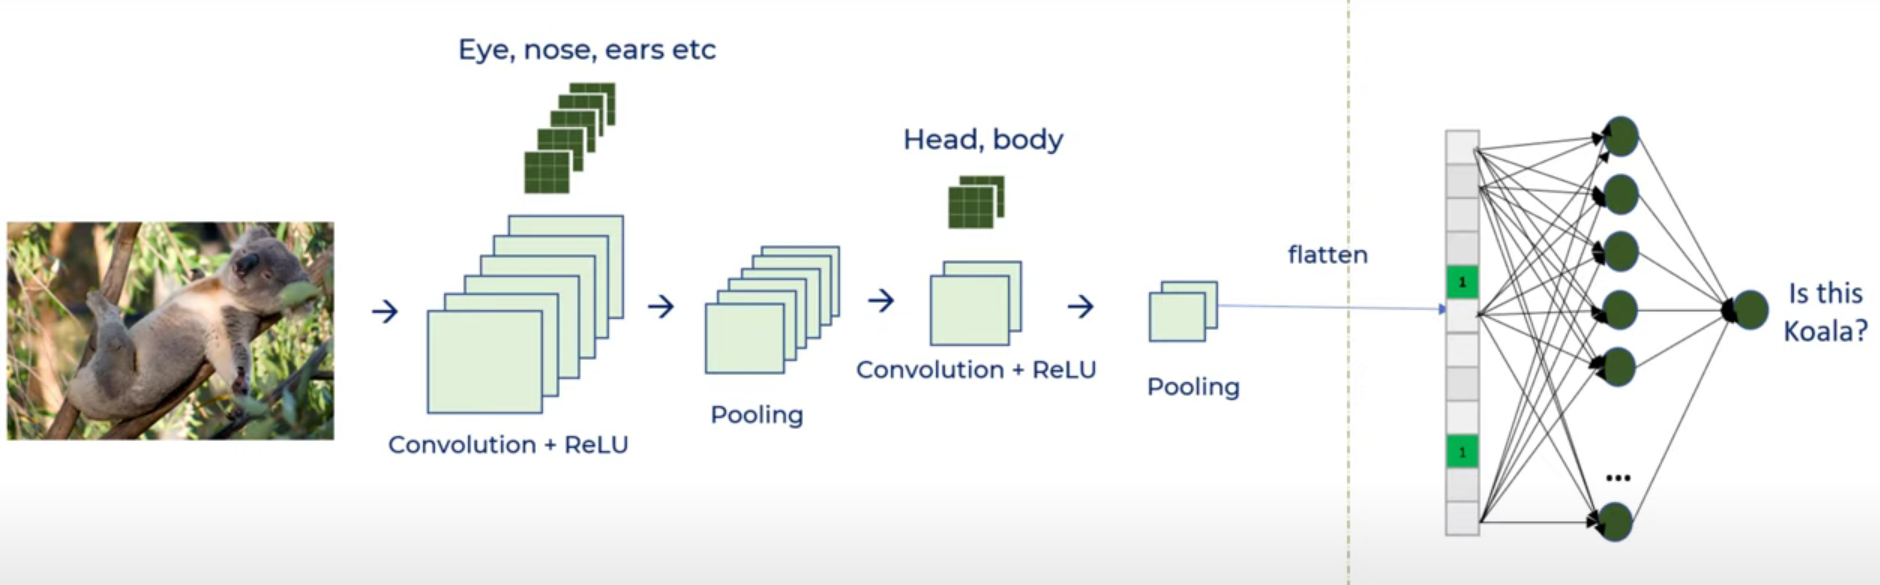

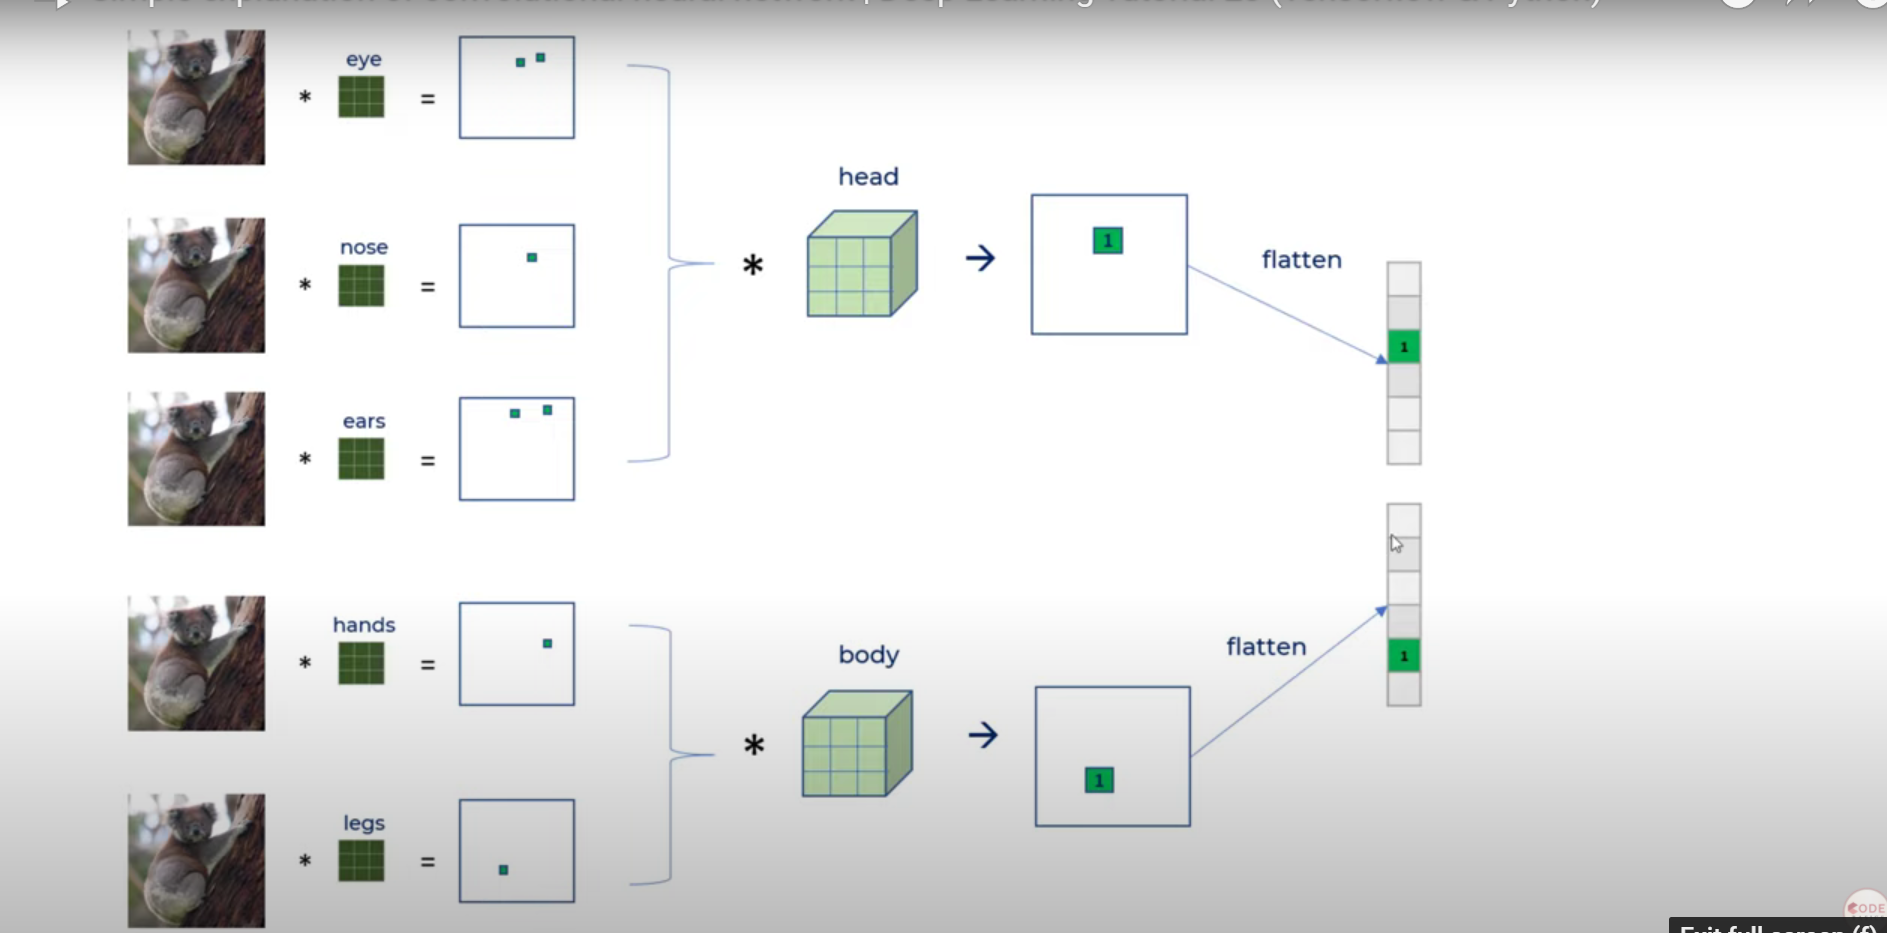

In [38]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [39]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [40]:
def plot_image(x,y,index):
    plt.figure(figsize=(0.5,0.5))
    plt.imshow(x[index])
    plt.title(classes[y.reshape(-1)[index]])

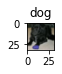

In [41]:
plot_image(x_train,y_train,215)

In [143]:
x_train = x_train/255
x_test = x_test/255
y_train = y_train.reshape(-1)

In [144]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(3000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [67]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.9340 - accuracy: 0.2991
Epoch 2/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.6419 - accuracy: 0.4223
Epoch 3/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5518 - accuracy: 0.4528
Epoch 4/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.4901 - accuracy: 0.4715
Epoch 5/5
1563/1563 [==============================] - 120s 76ms/step - loss: 1.4465 - accuracy: 0.4900


In [68]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 23ms/step - loss: 1.4606 - accuracy: 0.4793


[1.4605591297149658, 0.47929999232292175]

In [69]:
y_predicted = model.predict(x_test)
y_predicted = [np.argmax(element) for element in y_predicted]
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56      1000
           1       0.67      0.53      0.59      1000
           2       0.33      0.46      0.39      1000
           3       0.36      0.32      0.34      1000
           4       0.44      0.38      0.40      1000
           5       0.44      0.35      0.39      1000
           6       0.58      0.43      0.49      1000
           7       0.59      0.50      0.54      1000
           8       0.73      0.46      0.57      1000
           9       0.40      0.75      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



In [70]:
cnn = Sequential()
#cnn
cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(MaxPooling2D((2,2)))

#Dense
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='sigmoid'))

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])   

In [71]:
cnn.fit(x_train,y_train,epochs=2)

Epoch 1/2
1563/1563 [==============================] - 54s 34ms/step - loss: 1.6691 - accuracy: 0.3904
Epoch 2/2
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1506 - accuracy: 0.5990


In [72]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.1934 - accuracy: 0.5874


[1.193363070487976, 0.5874000191688538]

In [74]:
y_predicted = cnn.predict(x_test)
y_predicted = [np.argmax(element) for element in y_predicted]
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.51      0.62      1000
           1       0.75      0.71      0.73      1000
           2       0.62      0.32      0.42      1000
           3       0.41      0.36      0.38      1000
           4       0.58      0.43      0.50      1000
           5       0.39      0.75      0.51      1000
           6       0.49      0.88      0.63      1000
           7       0.84      0.53      0.65      1000
           8       0.80      0.65      0.72      1000
           9       0.67      0.72      0.70      1000

    accuracy                           0.59     10000
   macro avg       0.63      0.59      0.59     10000
weighted avg       0.63      0.59      0.59     10000



In [148]:
one_prediction = cnn.predict(x_test[[18]])
one_prediction.argmax()

8

In [149]:
classes[8]

'ship'

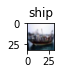

In [151]:
plot_image(x_test,y_test,18)

# Data Augmentation

In [43]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [44]:
data_dir

'.\\datasets\\flower_photos'

In [45]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [46]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

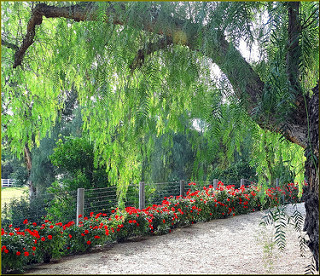

In [47]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[5]))

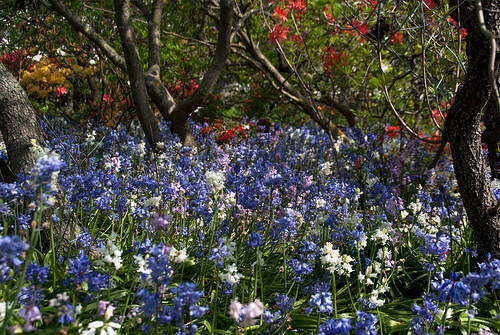

In [48]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [49]:
flower_image_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'daisy':list(data_dir.glob('daisy/*'))
}

In [50]:
flower_label_dict = {
    'roses':0,
    'tulips':1,
    'dandelion':2,
    'sunflowers':3,
    'daisy':4
}

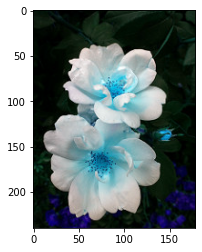

In [51]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape
plt.imshow(img)

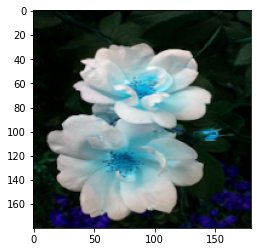

In [52]:
img = cv2.resize(img,(180,180))
img.shape
plt.imshow(img)

In [53]:
x,y = [] , [] 
for flower_name,images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img,(180,180))
        x.append(resize_img)
        y.append(flower_label_dict[flower_name])    

In [54]:
x = np.array(x)
y = np.array(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
x_train = x_train/255
x_test = x_test/255

In [55]:
model = Sequential()
#cnn
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))


#Dense
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='sigmoid'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])   

In [210]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
92/92 [==============================] - 71s 771ms/step - loss: 0.9575 - accuracy: 0.6311
Epoch 2/3
92/92 [==============================] - 72s 781ms/step - loss: 0.7837 - accuracy: 0.7105
Epoch 3/3
92/92 [==============================] - 71s 773ms/step - loss: 0.5587 - accuracy: 0.7902


In [56]:
from keras.models import load_model
model.save('imagemodel.h5')

ValueError: Weights for model sequential_1 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [57]:
model = load_model('imagemodel.h5')

In [58]:
model.evaluate(x_test,y_test)

23/23 [==============================] - 5s 188ms/step - loss: 0.9083 - accuracy: 0.6757


[0.908251941204071, 0.6757493019104004]

In [59]:
predictions = model.predict(x_test)

In [60]:
predictions

array([[0.7954873 , 0.79690015, 0.39737278, 0.03396493, 0.75557125],
       [0.6533653 , 0.70987356, 0.30261883, 0.03914511, 0.9448577 ],
       [0.8347007 , 0.59972465, 0.85925025, 0.00602609, 0.46025288],
       ...,
       [0.02009249, 0.3770935 , 0.99612355, 0.99638426, 0.01691729],
       [0.70417356, 0.9393948 , 0.4107752 , 0.31044233, 0.2743442 ],
       [0.9691747 , 0.97632915, 0.10901579, 0.2846771 , 0.27619302]],
      dtype=float32)

In [61]:
y_predicted = []
for i in predictions:
    y_predicted.append(np.argmax(i))
y_predicted = np.array(y_predicted)    

In [62]:
y_predicted.shape

(734,)

In [269]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomContrast(0.9)
])

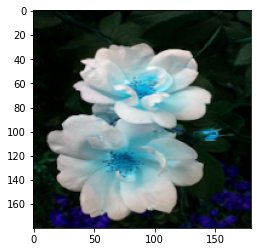

In [270]:
plt.imshow(x[0])

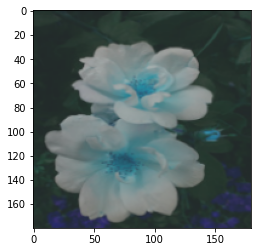

In [271]:
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

# Retrain a Model

In [74]:
IMAGE_SHAPE = (224,224)
classifier = Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4",input_shape=IMAGE_SHAPE+(3,))
])

In [75]:
goldfish = PIL.Image.open('goldfish.jpg')
resize_img = goldfish.resize(IMAGE_SHAPE)

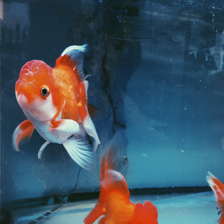

In [76]:
resize_img

In [77]:
gold_fish = np.array(resize_img)/255

In [78]:
img = gold_fish[np.newaxis,...]

In [79]:
predicted = classifier.predict(img)

In [80]:
np.argmax(predicted)

2

In [81]:
image_labels = []
with open('mobilnetlabels.txt') as f:
    image_labels = f.read().splitlines()
    
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [109]:
prediction = classifier.predict(flower.reshape(1,224,224,3))
np.argmax(predictions)

503

In [110]:
image_labels[500]

'cleaver'

In [105]:
flower = cv2.resize(x_train[0],(224,224))
flower.shape

(224, 224, 3)

Retraning the model

In [127]:
feature_extractor_model = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model,input_shape=(224,224,3),trainable=False)

In [128]:
num_of_flower = 5
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flower)
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])   

In [129]:
x,y = [] , [] 
for flower_name,images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img,(224,224))
        x.append(resize_img)
        y.append(flower_label_dict[flower_name])    

In [130]:
x = np.array(x)
y = np.array(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
x_train = x_train/255
x_test = x_test/255

In [131]:
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
92/92 [==============================] - 128s 1s/step - loss: 2.9280 - accuracy: 0.3633
Epoch 2/2
92/92 [==============================] - 119s 1s/step - loss: 1.6074 - accuracy: 0.4300


In [132]:
model.save('retrained_model.h5')

In [133]:
model.evaluate(x_test,y_test)

23/23 [==============================] - 26s 1s/step - loss: 1.6094 - accuracy: 0.3992


[1.6094377040863037, 0.3991825580596924]

# YOLO Algorithm

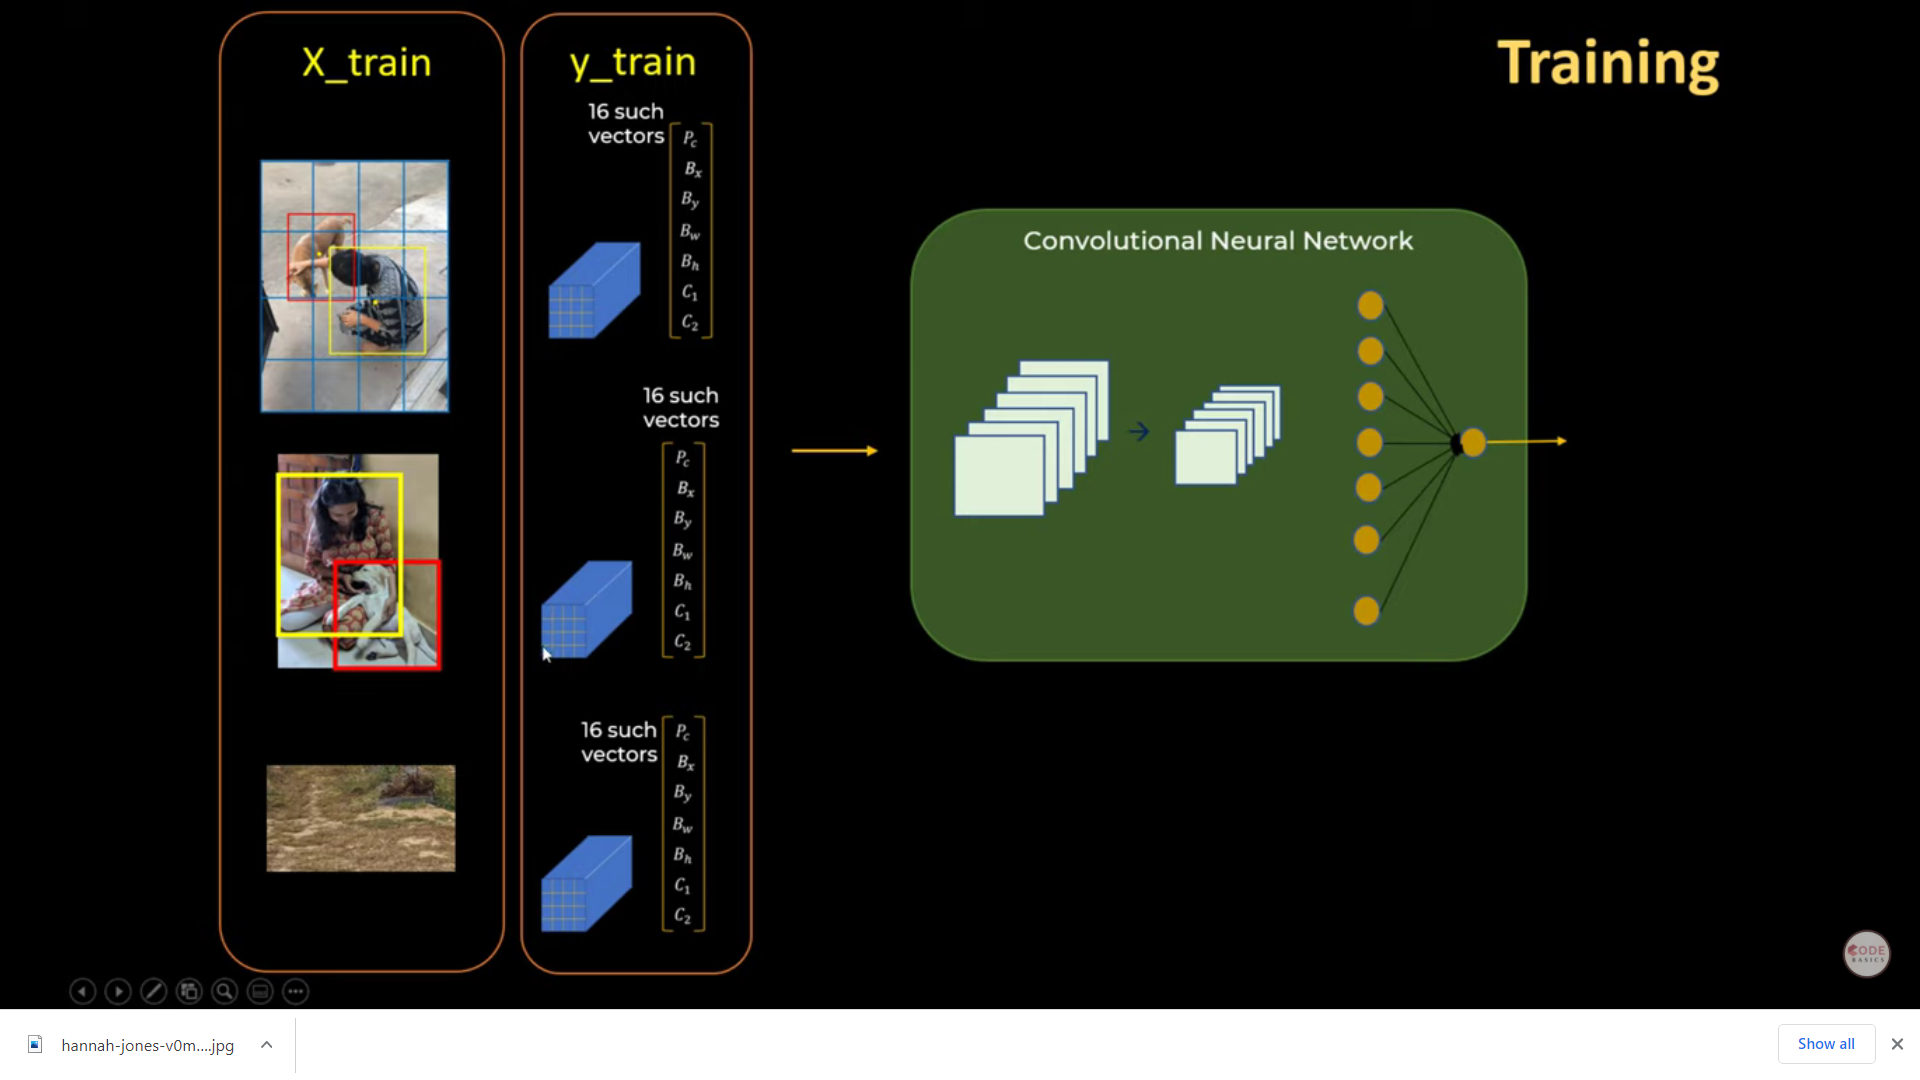